In [ ]:
Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. 
By understanding the distribution, central tendencies, and relationships of various product attributes, 
businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on 
product categories, brands, prices, ratings, and more from from Amazon UK. 
You'll need to download it to start working with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

path = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\lab1_EDA_univariate\amz_uk_price_prediction_dataset.csv"

data=pd.read_csv(path)

In [2]:
data.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
data.shape

(2443651, 9)

In [ ]:
#Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, 
and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

Visualizations:

Display the distribution of products across different categories using a bar chart. 
If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [5]:
data['category'].nunique()

296

In [6]:
category_counts = data['category'].value_counts()
print(category_counts)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [7]:
frequency_table = data["category"].value_counts()

proportion_table = data["category"].value_counts(normalize = True)

frequency_table, proportion_table*100

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         34.221949
 Beauty                                     0.790293
 Handmade Clothing, Shoes & Accessories     0.786896
 Bath & Body                                0.781290
 Birthday Gifts                             0.776625
                                             ...    
 Alexa Built-In Devices                     0.004379
 Motorbike Chassis

Text(0.5, 0, 'No. of products')

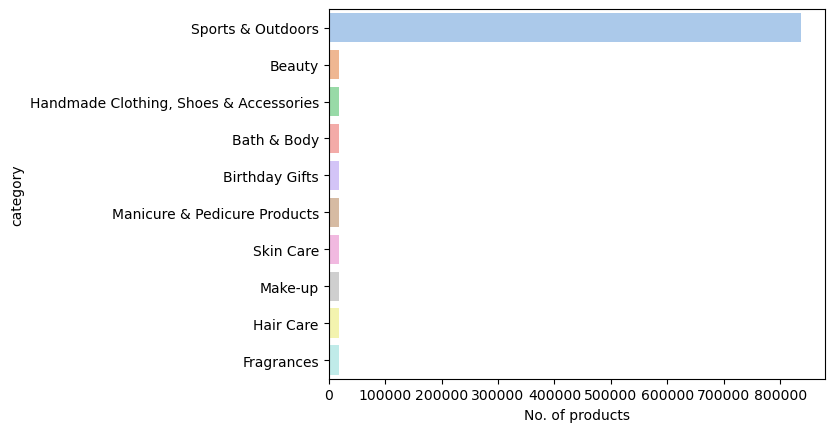

In [8]:
top_10_values = frequency_table.head(10)
ax = sns.barplot(y=top_10_values.index, x=top_10_values.values, palette="pastel")

ax.set_xlabel('No. of products')

Text(0.5, 0, '% of total products')

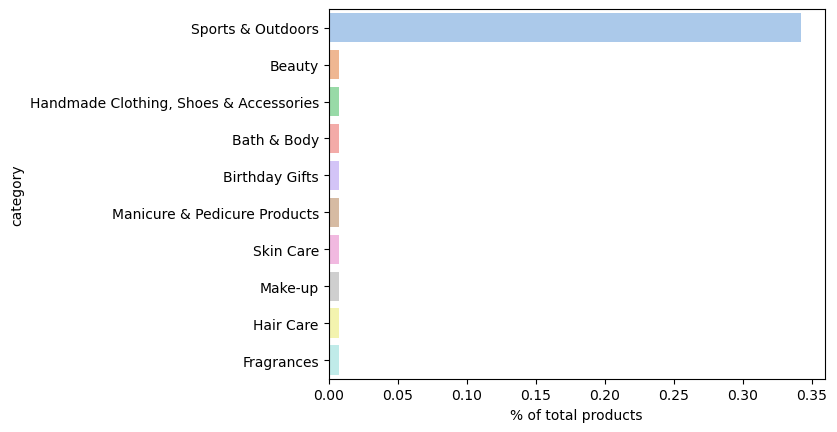

In [9]:
top_10_perc = proportion_table.head(10)
ax = sns.barplot(y=top_10_perc.index, x=top_10_perc.values, palette="pastel")

ax.set_xlabel('% of total products')

In [10]:
top_5_values = pd.DataFrame({'category': frequency_table.head(5).index, 'count': frequency_table.head(5).values})

In [11]:
top_5_values

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


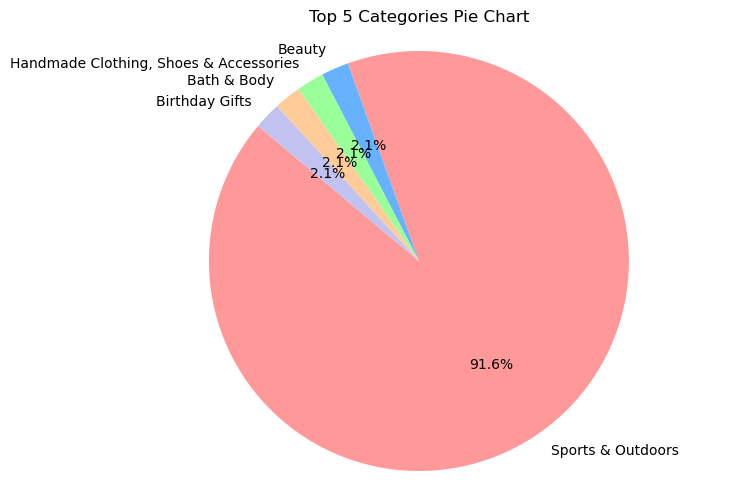

In [12]:
labels = top_5_values['category']
sizes = top_5_values['count']

pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.axis('equal')

plt.title('Top 5 Categories Pie Chart')
plt.show()


In [22]:
#Part 2: Delving into Product Pricing
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?
#Measures of Dispersion:

#Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?

In [14]:
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode()

mean_price, median_price, mode_price

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [15]:
var_price = data['price'].var()
std_dev_price = data['price'].std()

# Calculating interquartile range
q1 = np.percentile(data['price'], 25)
q3 = np.percentile(data['price'], 75)
interquartile_range_price = q3 - q1

# Calculating range
range_price = max(data['price']) - min(data['price'])

var_price, std_dev_price, range_price, interquartile_range_price

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

In [ ]:
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? 
Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price', ylabel='Count'>

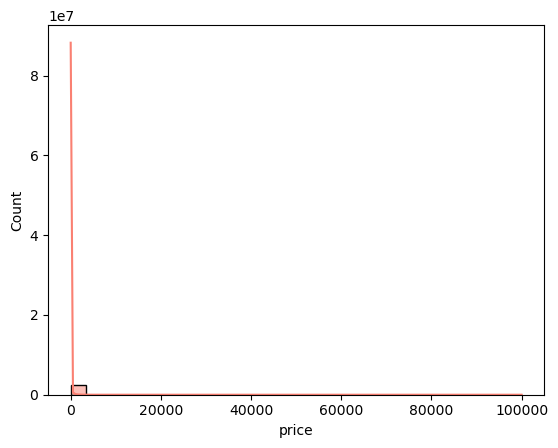

In [26]:
sns.histplot(data["price"], kde = True, bins =30, color="salmon")

<Axes: >

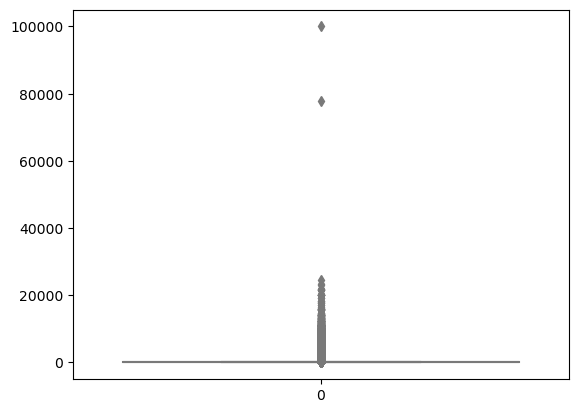

In [27]:
sns.boxplot(data=data["price"],color='lightblue')

In [38]:
# how to improve visuals - try and do histograms for a range

# remove rows with prices > 5* avg price

mean_price = data['price'].mean()

# Create new DataFrame containing only rows with price less than mean_price
data_price_restricted = data[data['price'] <5*mean_price]

<Axes: xlabel='price', ylabel='Count'>

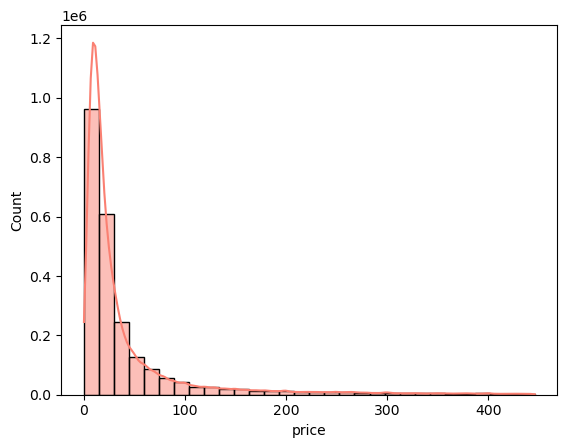

In [39]:
sns.histplot(data_price_restricted["price"], kde = True, bins =30, color="salmon")

In [44]:
# remove rows with prices > 50 * avg price

mean_price = data['price'].mean()

# Create new DataFrame containing only rows with price less than mean_price
data_price_restricted2 = data[data['price'] >50*mean_price]

<Axes: xlabel='price', ylabel='Count'>

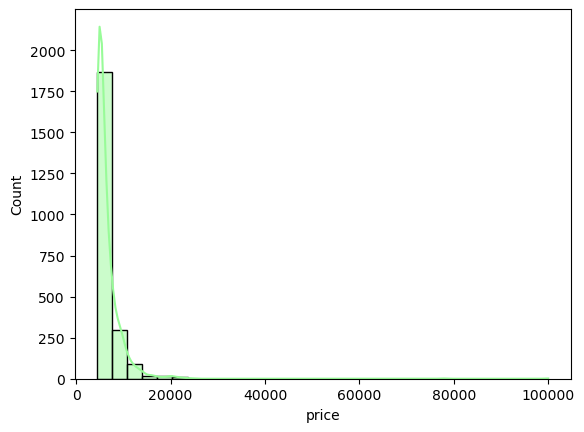

In [45]:
sns.histplot(data_price_restricted2["price"], kde = True, bins =30, color="palegreen")

In [ ]:
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [46]:
mean_rating = data['stars'].mean()
median_rating = data['stars'].median()
mode_rating = data['stars'].mode()

mean_rating, median_rating, mode_rating

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

In [50]:
data['stars'].isnull().sum()

0

In [53]:
data['stars'].value_counts() # most people give 0 stars

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [ ]:
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [55]:
var_rating = data['stars'].var()
std_dev_rating = data['stars'].std()

# Calculating interquartile range
q1 = np.percentile(data['stars'], 25)
q3 = np.percentile(data['stars'], 75)
interquartile_range_rating = q3 - q1

# Calculating range
range_rating = max(data['stars']) - min(data['stars'])

var_rating, std_dev_rating, range_rating, interquartile_range_rating # wide variation

(4.81743402976196, 2.1948653785054697, 5.0, 4.4)

In [56]:
skewness_rating = data['stars'].skew()
kurtosis_rating = data['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

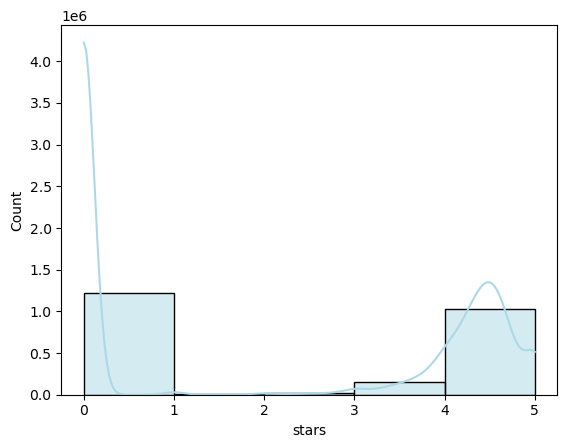

In [59]:
sns.histplot(data["stars"], kde = True, bins =5, color="lightblue")